In [280]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})
df.drop('0_price', axis=1, inplace=True)
df.drop('1_price', axis=1, inplace=True)
df.drop('2_price', axis=1, inplace=True)
df.drop('3_price', axis=1, inplace=True)
df.drop('4_price', axis=1, inplace=True)


# df = df[df['stabilized_spread'] >= 0.2]
df = df[abs(df['last_price_delta_since_stabilized']) < 10]
df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

# for col in df.columns:
#     if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
#         df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_nr_trades,0_spread,1_amount_mean,1_nr_trades,1_spread,2_amount_mean,2_nr_trades,2_spread,3_amount_mean,...,stabilized_amount_mean,stabilized_at_ms,stabilized_nr_trades,stabilized_spread,wave_direction,0_price_delta,1_price_delta,2_price_delta,3_price_delta,4_price_delta
0,0.0140,3.0,0.37,0.0125,4.0,0.37,0.0176,12.0,0.62,0.0491,...,0.0448,214,21.0,0.77,-1.0,0.40,0.40,0.15,0.10,0.00
1,0.0270,6.0,0.48,0.0463,9.0,0.52,0.0423,11.0,0.52,0.0462,...,0.0415,91,19.0,0.79,1.0,0.31,0.27,0.27,0.07,0.03
2,0.0012,3.0,0.44,0.0022,4.0,0.57,0.0019,5.0,0.57,0.0019,...,0.0046,221,8.0,0.78,1.0,0.34,0.21,0.21,0.20,0.00
3,0.0417,4.0,0.69,0.0221,10.0,0.79,0.0202,11.0,0.79,0.0573,...,0.0526,300,14.0,0.95,-1.0,0.26,0.16,0.16,0.16,0.08
4,0.0053,3.0,0.33,0.0569,4.0,0.39,0.0551,5.0,0.39,0.0527,...,0.0488,185,11.0,0.51,-1.0,0.18,0.12,0.12,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,0.0256,7.0,0.30,0.0349,8.0,0.31,0.0275,13.0,0.45,0.0338,...,0.0283,57,17.0,0.62,-1.0,0.28,0.27,0.17,0.17,0.06
14447,0.0043,7.0,0.04,0.0042,8.0,0.04,0.0038,9.0,0.23,0.0034,...,0.0038,378,12.0,0.44,1.0,0.40,0.40,0.21,0.19,0.19
14448,0.0782,8.0,0.35,0.0696,9.0,0.50,0.0664,10.0,0.56,0.0639,...,0.0549,284,13.0,0.61,1.0,0.11,0.11,0.05,0.04,0.03
14449,0.0082,5.0,0.66,0.0053,8.0,0.66,0.0048,9.0,0.66,0.0044,...,0.0116,273,19.0,0.83,1.0,0.17,0.17,0.17,0.17,0.17


In [281]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0)

0_amount_mean                         -23.328213
1_amount_mean                         -22.169272
4_amount_mean                         -17.385683
stabilized_amount_mean                -17.087072
3_amount_mean                         -16.949712
2_amount_mean                         -16.145101
0_price_delta                         -14.662104
4_spread                              -12.114804
3_spread                              -12.044922
2_spread                              -11.794785
stabilized_spread                     -11.389370
1_spread                              -10.896911
1_price_delta                          -4.320932
2_price_delta                          -2.423656
4_nr_trades                            -1.589779
3_nr_trades                            -1.426533
3_price_delta                          -1.193411
2_nr_trades                            -0.405154
4_price_delta                          -0.294032
stabilized_at_ms                        0.779900
1_nr_trades         

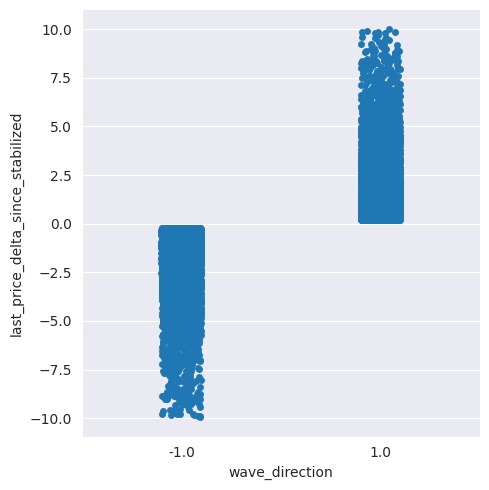

In [282]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


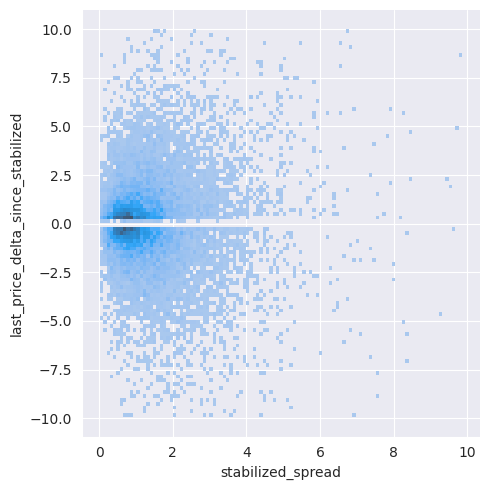

In [283]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


<AxesSubplot: xlabel='2_price_delta', ylabel='last_price_delta_since_stabilized'>

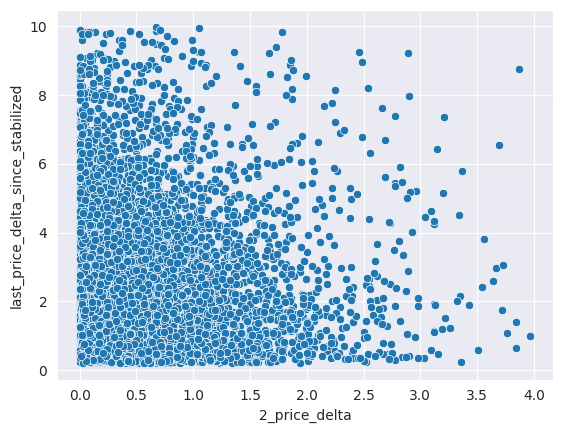

In [290]:
sns.scatterplot(x=df['0_price_delta'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['1_price_delta'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['2_price_delta'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['3_price_delta'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['4_price_delta'], y=abs(df.last_price_delta_since_stabilized))

